<a href="https://colab.research.google.com/github/humanet1603/krx_using_api/blob/main/Data_Table_Display%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('//content/NVDA.csv')

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate moving averages for the 'Close' price
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

# Calculate MACD
# MACD is the 12-period EMA minus the 26-period EMA
df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
# Signal line is the 9-period EMA of the MACD
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Calculate RSI
delta = df['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
df['RSI'] = 100 - (100/(1 + rs))

# Display the DataFrame with the new columns
df = df[['Date', 'Close', 'MA5', 'MA20', 'MACD', 'Signal', 'RSI']]
df.head()  # Show the head of the dataframe as an example


,Date,Close,MA5,MA20,MACD,Signal,RSI
0,2023-04-17,270.019989,NaN,NaN,0.000000,0.000000,NaN
1,2023-04-18,276.670013,NaN,NaN,0.530486,0.106097,100.000000
2,2023-04-19,279.309998,NaN,NaN,1.150661,0.315010,100.000000
3,2023-04-20,271.040009,NaN,NaN,0.963726,0.444753,90.911770
4,2023-04-21,271.190002,273.646002,NaN,0.818249,0.519452,90.927874


In [ ]:
# prompt: df DataFrame 사용: Date

df['Date'].unique()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<Axes: xlabel='Date'>

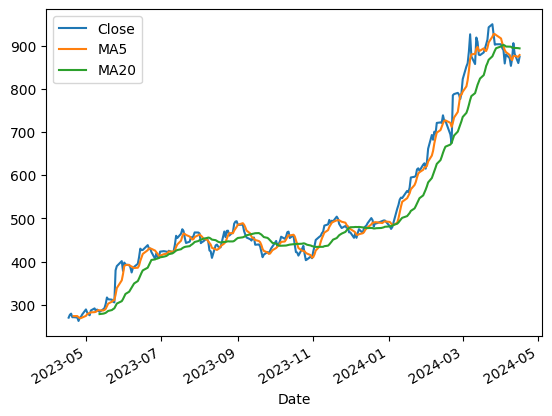

In [18]:
# @title Moving Averages vs Closing Price

df.plot(x='Date', y=['Close', 'MA5', 'MA20'], kind='line')

<Axes: xlabel='Date'>

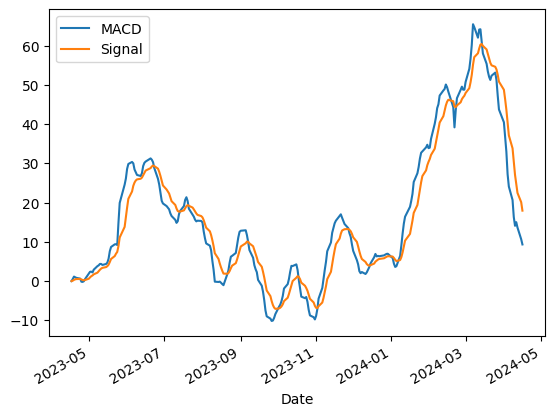

In [17]:
# @title MACD vs Signal

df.plot(x='Date', y=['MACD', 'Signal'], kind='line')

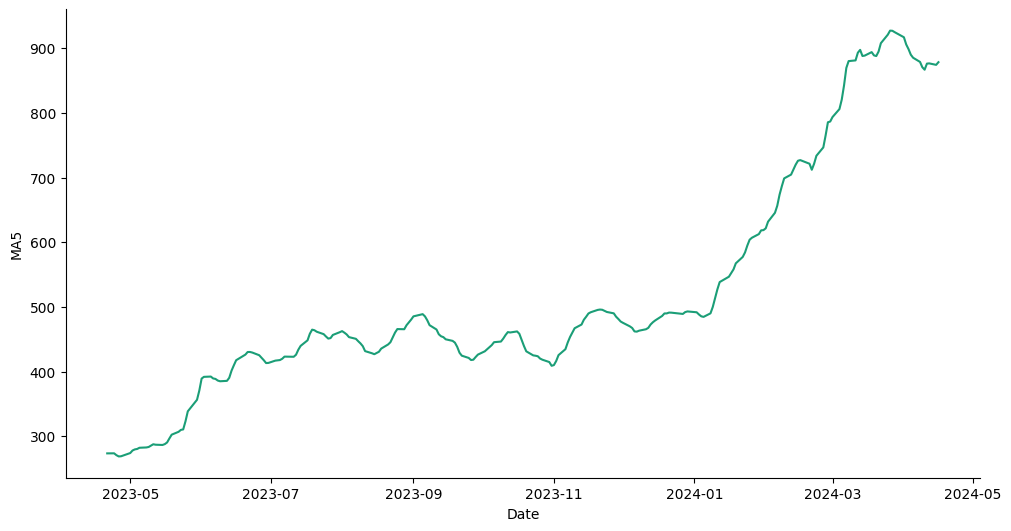

In [16]:
# @title Date vs MA5

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['MA5']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('MA5')

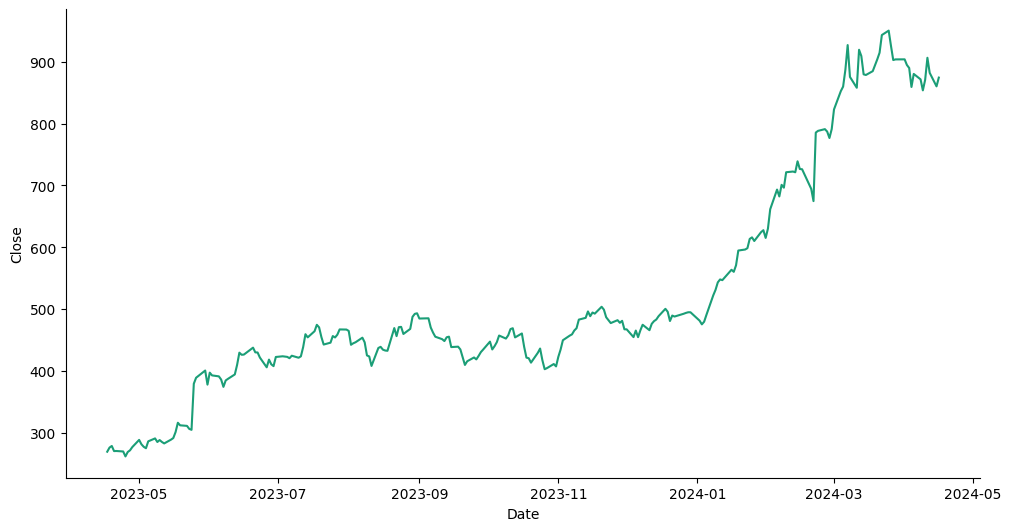

In [15]:
# @title Date vs Close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')